In [11]:
%matplotlib inline
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import reconstruct_3d as r3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
name = "house"
plot = True

In [ ]:
## Load images, K matrices and matches
data_dir = os.path.join('..', 'data', name)

# images
I1 = scipy.misc.imread(os.path.join(data_dir, "{}1.jpg".format(name)))
I2 = scipy.misc.imread(os.path.join(data_dir, "{}2.jpg".format(name)))

# K matrices
K1 = np.array(scipy.io.loadmat(os.path.join(data_dir, "{}1_K.mat".format(name)))["K"], order='C')
K2 = np.array(scipy.io.loadmat(os.path.join(data_dir, "{}2_K.mat".format(name)))["K"], order='C')

# corresponding points
# this is a N x 4 where:
# matches[i,0:2] is a point in the first image
# matches[i,2:4] is the corresponding point in the second image
matches = np.loadtxt(os.path.join(data_dir, "{}_matches.txt".format(name)))

# visualize matches (disable or enable this whenever you want)
if plot:
    fig, ax = plt.subplots()
    ax.imshow(np.concatenate([I1, I2], axis=1))
    ax.plot(matches[:, 0], matches[:, 1], 'r+')
    ax.plot(matches[:, 2] + I1.shape[1], matches[:, 3], 'r+')
    ax.plot(np.array([matches[:, 0], matches[:, 2] + I1.shape[1]]), matches[:, [1, 3]].T, 'r')

In [47]:
# compute the fundamental matrix
(F, res_err) = r3d.fundamental_matrix(matches)
print('Residual in F = {}'.format(res_err))

Residual in F = 0.3948162870821741


In [ ]:
# compute the essential matrix
E = np.dot(np.dot(K2.T, F), K1)

# compute the rotation and translation matrices
(R, t) = find_rotation_translation(E)

In [45]:
%matplotlib inline

from reconstruct_3d import reconstruct_3d

Residual in F = 0
Reconstruction error = 0.0


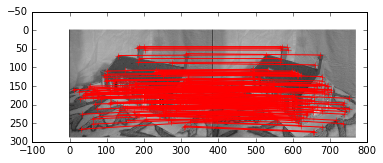

In [46]:
reconstruct_3d("house")